### **Data Description**

link dataset: https://github.com/sonlam1102/vihsd

Tập dữ liệu nhóm sử dụng cho bài toán phân loại văn bản độc hại là ViHSD, tập này được tác giả xây dựng từ việc thu thập các bình luận của người dùng về giải trí, người nổi tiếng, các vấn đề xã hội và chính trị từ các trang Facebook và video YouTube tiếng Việt khác nhau. Tác giả chọn các trang Facebook và kênh YouTube có tỷ lệ tương tác cao và không hạn chế bình luận. Sau khi thu thập dữ liệu, tác giả loại bỏ các thực thể tên riêng khỏi các bình luận để duy trì tính ẩn danh.

Tập dữ liệu này chứa 33.400 bình luận đã được chú thích được sử dụng để phát hiện lời nói toxic trên các trang mạng xã hội. Gồm 3 file .csv:

*   train.csv
*   dev.csv
*   test.csv

Tập dữ liệu gồm có 3 nhãn:

*   CLEAN (không thù địch), label_id: 0
*   OFFENSIVE (xúc phạm), label_id: 1
*   HATE (thù địch), label_id: 2







### **Data Loading**

In [156]:
# !git clone https://github.com/sonlam1102/vihsd.git

In [157]:
# import zipfile
# import os

# zip_path = "/content/drive/MyDrive/NLP_midterm/data/vihsd.zip"
# extract_path = "/content/drive/MyDrive/NLP_midterm/data"

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# print(f"Giải nén xong vào: {extract_path}")


In [158]:
# !rm -rf /content/drive/MyDrive/NLP_midterm/data/__MACOSX
# !rm -rf /content/drive/MyDrive/NLP_midterm/data/vihsd.zip

In [159]:
train_data_path = "/kaggle/input/viehsd/train.csv"

val_data_path = "/kaggle/input/viehsd/dev.csv"

test_data_path = "/kaggle/input/viehsd/test.csv"

In [160]:
import pandas as pd

df_train = pd.read_csv(train_data_path, encoding='utf-8')
df_val = pd.read_csv(val_data_path, encoding='utf-8')
df_test = pd.read_csv(test_data_path, encoding='utf-8')

In [161]:
print("Shape of train: ", df_train.shape)
print("Shape of val: ", df_val.shape)
print("Shape of test: ", df_test.shape)

Shape of train:  (24048, 2)
Shape of val:  (2672, 2)
Shape of test:  (6680, 2)


In [162]:
print("Train:")
df_train.head()

Train:


,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0


In [163]:
print("Val:\n")
df_val.head()

Val:



,free_text,label_id
0,Coi cười xỉu,0
1,Chi ba vang ngoc dep va tre mai,0
2,"Chần vần một đống, không ai đoán trước được đừ...",0
3,Du học sinh Úc mà lại,0
4,Dm báo lá cải.. Nghĩ gì khi ở qn mà có hơn 30%...,0


In [164]:
print("Test:\n")
df_test.head()

Test:



,free_text,label_id
0,Đừng cố biện minh =)))) choi lon,0
1,Haizz. Nthe này thì dân khổ quá,1
2,the nay ma chi phat gay roi trat tu cong cong ...,0
3,Mua cho em hộp bcs mĩ sài cho oai :)),0
4,coin card :3,1


### **EDA**

Check null

In [165]:
df_list = [df_train, df_val, df_test]
df_name = ['df_train', 'df_val', 'df_test']

for df, name in zip(df_list, df_name):
    empty_rows = df[df['free_text'].isnull()]
    print(f"Số dòng trống {name}: {len(empty_rows)}")
    print(empty_rows.head())
    print()

Số dòng trống df_train: 2
      free_text  label_id
10950       NaN         1
20880       NaN         0

Số dòng trống df_val: 0
Empty DataFrame
Columns: [free_text, label_id]
Index: []

Số dòng trống df_test: 0
Empty DataFrame
Columns: [free_text, label_id]
Index: []



Check duplicate row

In [166]:
for df, name in zip(df_list, df_name):
    dup_rows = df[df.duplicated()]
    print(f"Số dòng trùng toàn bộ trong {name}: {len(dup_rows)}")
    print()

Số dòng trùng toàn bộ trong df_train: 1356

Số dòng trùng toàn bộ trong df_val: 21

Số dòng trùng toàn bộ trong df_test: 98



##### Statistics of Label Counts in each set.

In [167]:
train_counts = df_train['label_id'].value_counts().sort_index()
print("Train:\n", train_counts)

Train:
 label_id
0    19886
1     1606
2     2556
Name: count, dtype: int64


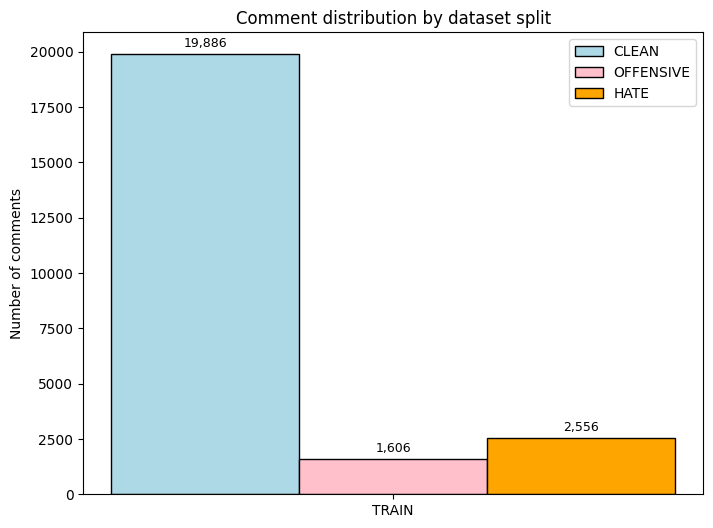

In [168]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['TRAIN']

clean     = train_counts.get(0, 0)
offensive = train_counts.get(1, 0)
hate      = train_counts.get(2, 0)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(8,6))

# Plot group
rects1 = ax.bar(x - width, clean, width, label='CLEAN', color='lightblue', edgecolor='black')
rects2 = ax.bar(x, offensive, width, label='OFFENSIVE', color='pink', edgecolor='black')
rects3 = ax.bar(x + width, hate, width, label='HATE', color='orange', edgecolor='black')

# Add text above each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:,}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.set_ylabel('Number of comments')
ax.set_title('Comment distribution by dataset split')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


### **Data Preprocessing**

##### Add toxic comment vietnamese dataset

link data: https://www.kaggle.com/datasets/trandong2932002/toxic-comment-vietnamese?resource=download

Nguồn dữ liệu này xuất phát từ thử thách phân loại bình luận độc hại, được tổ chức và
cung cấp bởi Conversation AI, một nhóm nghiên cứu do Jigsaw và Google thành lập.

Tập dữ liệu này gồm có 9 thuộc tính:

* #: chứa index dòng

*  id: chứa id của comment

* translated_comment_text: chứa comment

* toxic: 1 nếu toxic (tổng quát)

* severe_toxic: toxic nặng

* obscene: thô tục

* threat: đe dọa

* insult: xúc phạm

* identity_hate: thù ghét cá nhân/nhóm

Quy ước đánh label:

* Nếu insult=1 và threat=0 và identity_hate=0 → gán OFFENSIVE.

* Nếu identity_hate=1 → gán HATE.

* Nếu nhiều nhãn phụ cùng 1 lúc → ưu tiên HATE (toxic nặng).

Load toxic data


---



In [169]:
import kagglehub

# Dowload toxic comment dataset
added_path_1 = kagglehub.dataset_download("trandong2932002/toxic-comment-vietnamese")

print("Path to dataset files:", added_path_1)

Path to dataset files: /kaggle/input/toxic-comment-vietnamese


In [170]:
import os

print(os.listdir(added_path_1))

['translated_toxic_comment.csv']


In [171]:
df_add_1 = pd.read_csv(os.path.join(added_path_1, "translated_toxic_comment.csv"), \
                     encoding='utf-8')
print(df_add_1.shape)

(159571, 9)


In [172]:
df_add_1.head()


,Unnamed: 0,id,translated_comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0000997932d777bf,""" giải_thích lý_do tại_sao các sửa_đổi được th...",0,0,0,0,0,0
1,1,000103f0d9cfb60f,""" thật kinh_ngạc ! anh ấy hợp với màu nền này ...",0,0,0,0,0,0
2,2,000113f07ec002fd,""" này anh bạn , tôi thực_sự không cố_gắng chỉn...",0,0,0,0,0,0
3,3,0001b41b1c6bb37e,""" "" hơn_nữa tôi không_thể đưa ra bất_kỳ đề_xuấ...",0,0,0,0,0,0
4,4,0001d958c54c6e35,""" thưa ông , ông là người_hùng của tôi . ông c...",0,0,0,0,0,0


In [173]:
df_add_1.columns

Index(['Unnamed: 0', 'id', 'translated_comment_text', 'toxic', 'severe_toxic',
       'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

Map label


---



In [174]:
def map_label_toxic_data(row):
    if row['identity_hate'] == 1 or row['threat'] == 1:
        return 2   # HATE
    elif row['insult'] == 1 or row['obscene'] == 1 or row['toxic'] == 1 or row['severe_toxic'] == 1:
        return 1   # OFFENSIVE
    else:
        return 0   # CLEAN

df_add_1['label_id'] = df_add_1.apply(map_label_toxic_data, axis=1)


In [175]:
df_add_1['label_id'].value_counts()

label_id
0    143346
1     14440
2      1785
Name: count, dtype: int64

In [176]:
df_new = df_add_1[['translated_comment_text', 'label_id']]\
              .rename(columns={'translated_comment_text': 'free_text'})

df_offensive_10k = df_new[df_new['label_id'] == 1].sample(n=10000, \
                                                          random_state=42)
df_hate = df_new[df_new['label_id'] == 2]
df_train = pd.concat([df_train, df_offensive_10k, df_hate], ignore_index=True)


In [177]:
print(df_train['label_id'].value_counts())

label_id
0    19886
1    11606
2     4341
Name: count, dtype: int64


##### Remove icon

In [178]:
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\u2600-\u26FF"
        u"\u2700-\u27BF"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', text)


##### Remove null row

In [179]:
df_train = df_train.dropna(subset=['free_text'])
df_val = df_val.dropna(subset=['free_text'])
df_test = df_test.dropna(subset=['free_text'])

df_list = [df_train, df_val, df_test]
df_name = ['df_train', 'df_val', 'df_test']

for df, name in zip(df_list, df_name):
    empty_rows = df[df['free_text'].isnull()]
    print(f"Số dòng trống {name}: {len(empty_rows)}")
    print(empty_rows.head())
    print()

Số dòng trống df_train: 0
Empty DataFrame
Columns: [free_text, label_id]
Index: []

Số dòng trống df_val: 0
Empty DataFrame
Columns: [free_text, label_id]
Index: []

Số dòng trống df_test: 0
Empty DataFrame
Columns: [free_text, label_id]
Index: []



##### Drop Duplicates

In [180]:
df_train = df_train.drop_duplicates()
df_val = df_val.drop_duplicates()
df_test = df_test.drop_duplicates()

df_list = [df_train, df_val, df_test]
for df, name in zip(df_list, df_name):
    dup_rows = df[df.duplicated()]
    print(f"Số dòng trùng toàn bộ trong {name}: {len(dup_rows)}")
    print()

Số dòng trùng toàn bộ trong df_train: 0

Số dòng trùng toàn bộ trong df_val: 0

Số dòng trùng toàn bộ trong df_test: 0



In [181]:
print("Shape of train: ", df_train.shape)
print("Shape of val: ", df_val.shape)
print("Shape of test: ", df_test.shape)

Shape of train:  (34435, 2)
Shape of val:  (2651, 2)
Shape of test:  (6582, 2)


##### Teencode Normalization

Load teancode dataset

In [182]:
!pip install kagglehub

import kagglehub

# Dowload teencode dataset
teencode_path = kagglehub.dataset_download("khitrngvn/teencode")

print("Path to dataset files:", teencode_path)

Path to dataset files: /kaggle/input/teencode


In [183]:
print(os.listdir(teencode_path))

['teencode.txt']


Read teencode.txt

In [184]:
import os

teencode_dict = {}
with open(os.path.join(teencode_path, "teencode.txt"), "r", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split("\t")  # tách theo tab
        if len(parts) == 2:
            teencode_dict[parts[0]] = parts[1]

print("Số từ teencode:", len(teencode_dict))
print(list(teencode_dict.items())[:10])


Số từ teencode: 389
[('ctrai', 'con trai'), ('khôg', 'không'), ('bme', 'bố mẹ'), ('cta', 'chúng ta'), ('mih', 'mình'), ('mqh', 'mối quan hệ'), ('cgai', 'con gái'), ('nhữg', 'những'), ('mng', 'mọi người'), ('svtn', 'sinh viên tình nguyện')]


Normalization Function

In [185]:
import re

def normalize_teencode(text, mapping):
    for k, v in mapping.items():
        text = re.sub(rf"\b{k}\b", v, text)
    return text

##### Remove special characters and extra Whitespace

In [186]:
def remove_special_characters(text):
    text = re.sub(r"[^0-9a-zA-ZÀ-ỹ\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

##### Stop-word Filtering

Load stopword dataset

In [187]:
!wget https://huggingface.co/tpha4308/keyword-extraction-viet/resolve/main/vietnamese-stopwords-dash.txt -O vietnamese-stopwords-dash.txt

--2025-10-12 15:45:43--  https://huggingface.co/tpha4308/keyword-extraction-viet/resolve/main/vietnamese-stopwords-dash.txt
Resolving huggingface.co (huggingface.co)... 13.226.251.112, 13.226.251.20, 13.226.251.66, ...
Connecting to huggingface.co (huggingface.co)|13.226.251.112|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: /api/resolve-cache/models/tpha4308/keyword-extraction-viet/c57bc14fc86f12fab7fd4a624288de090c945b3f/vietnamese-stopwords-dash.txt?%2Ftpha4308%2Fkeyword-extraction-viet%2Fresolve%2Fmain%2Fvietnamese-stopwords-dash.txt=&etag=%22218784017ae42f3c49a44694831c4df41b0580c6%22 [following]
--2025-10-12 15:45:43--  https://huggingface.co/api/resolve-cache/models/tpha4308/keyword-extraction-viet/c57bc14fc86f12fab7fd4a624288de090c945b3f/vietnamese-stopwords-dash.txt?%2Ftpha4308%2Fkeyword-extraction-viet%2Fresolve%2Fmain%2Fvietnamese-stopwords-dash.txt=&etag=%22218784017ae42f3c49a44694831c4df41b0580c6%22
Reusing existing connection t

In [188]:
with open("vietnamese-stopwords-dash.txt", "r", encoding="utf-8") as f:
    stopwords = {line.strip() for line in f}

print("Số lượng stopwords:", len(stopwords))
print("10 stopwords đầu:", list(stopwords)[:10])

Số lượng stopwords: 1995
10 stopwords đầu: ['đưa_em', 'lại_làm', 'có_thể', 'tốt_ngày', 'ô_hay', 'dầu_sao', 'tập_trung', 'nhiệt_liệt', 'tuy_rằng', 'quả_vậy']


Filter stopword function

In [189]:
def filter_stop_words(text, stopwords):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]
    return " ".join(tokens)

##### Data processing function

In [190]:
!pip install pyvi

In [191]:
from pyvi.ViTokenizer import ViTokenizer

def preprocess(text, stopwords):
    text = normalize_teencode(text, teencode_dict)
    text = deEmojify(text)
    text = remove_special_characters(text)
    text = ViTokenizer.tokenize(text)
    text = filter_stop_words(text, stopwords)
    return text.lower()


In [192]:
df_train['clean_text'] = df_train['free_text'].apply(lambda x: preprocess(str(x), stopwords))
df_val['clean_text']   = df_val['free_text'].apply(lambda x: preprocess(str(x), stopwords))
df_test['clean_text']  = df_test['free_text'].apply(lambda x: preprocess(str(x), stopwords))


### **Post-Processing EDA**

##### Column Chart

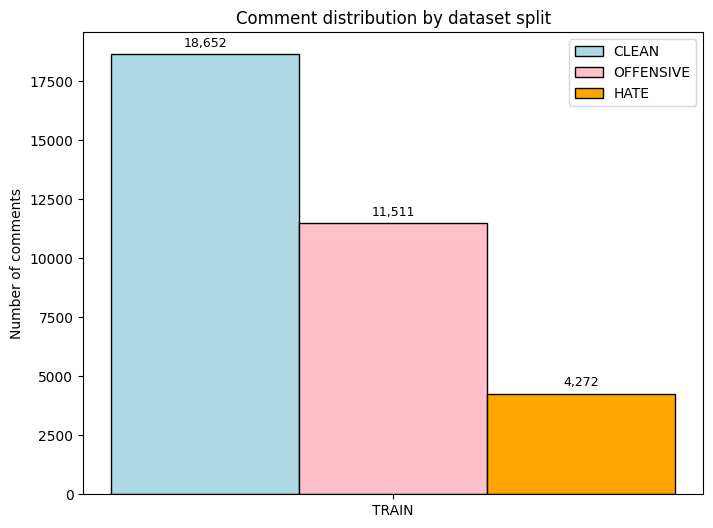

In [193]:
train_counts = df_train['label_id'].value_counts().sort_index()

labels = ['TRAIN']

clean     = train_counts.get(0, 0)
offensive = train_counts.get(1, 0)
hate      = train_counts.get(2, 0)

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(8,6))

# Plot group
rects1 = ax.bar(x - width, clean, width, label='CLEAN', color='lightblue', \
                edgecolor='black')
rects2 = ax.bar(x, offensive, width, label='OFFENSIVE', color='pink', \
                edgecolor='black')
rects3 = ax.bar(x + width, hate, width, label='HATE', color='orange', \
                edgecolor='black')

# Add text above each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:,}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.set_ylabel('Number of comments')
ax.set_title('Comment distribution by dataset split')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


##### Pie Chart

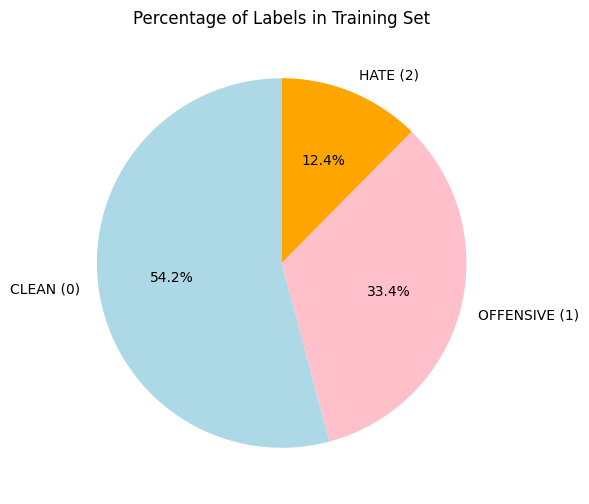

In [194]:
label_counts = df_train['label_id'].value_counts(normalize=True) * 100
labels = ['CLEAN (0)', 'OFFENSIVE (1)', 'HATE (2)']

plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=['lightblue','pink','orange'])
plt.title("Percentage of Labels in Training Set")
plt.show()

####

### **Data Preparation**

#####Split data

In [195]:
X_train = df_train['clean_text'].copy()
y_train = df_train['label_id'].copy()

X_val = df_val['clean_text'].copy()
y_val = df_val['label_id'].copy()

X_test = df_test['clean_text'].copy()
y_test = df_test['label_id'].copy()

# Gộp nhãn 1 và 2 thành 1
y_train = y_train.replace({2: 1})
y_val   = y_val.replace({2: 1})
y_test  = y_test.replace({2: 1})

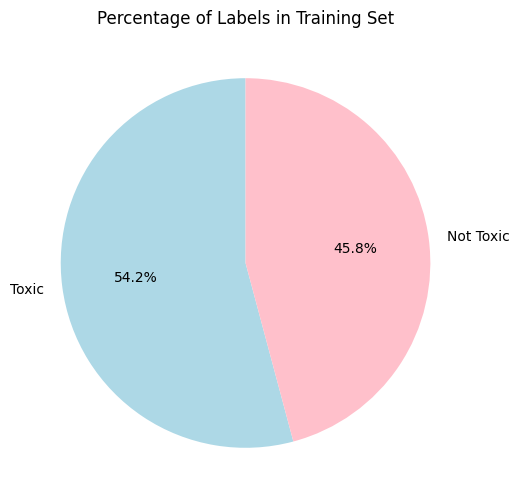

In [196]:
label_counts = y_train.value_counts(normalize=True) * 100
labels = ['Toxic', 'Not Toxic']

plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=['lightblue','pink'])
plt.title("Percentage of Labels in Training Set")
plt.show()

##### TF-IDF

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    sublinear_tf=True,)

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)
X_test_tfidf  = tfidf.transform(X_test)
X_train_tfidf_v1 = X_train_tfidf.copy()
X_val_tfidf_v1 = X_val_tfidf.copy()
X_test_tfidf_v1 = X_test_tfidf.copy()
print("Shape of X_train:", X_train_tfidf_v1.shape)
print("Shape of X_val:", X_val_tfidf_v1.shape)
print("Shape of X_test:", X_test_tfidf_v1.shape)


Shape of X_train: (34435, 5000)
Shape of X_val: (2651, 5000)
Shape of X_test: (6582, 5000)


##### Embedding

In [198]:
!pip install transformers==4.44.2 huggingface-hub==0.23.2 tokenizers==0.19.1 safetensors==0.4.3


In [199]:
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel, AutoModelForMaskedLM, pipeline


class PhoBERTEmbedder:
    def __init__(
        self,
        model_name="vinai/phobert-base-v2",
        max_len=128,
        device=None,
        enable_fill_mask=True,
    ):
        """
        PhoBERTEmbedder: class hỗ trợ 2 chức năng:
        1. Trích xuất embedding (như sentence embedding)
        2. Dự đoán từ bị che (fill-mask)
        """
        self.model_name = model_name
        self.max_len = max_len
        self.device = device if device else ("cuda" if torch.cuda.is_available() else "cpu")

        # Load tokenizer
        self.tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True, chat_template=None)

        # Load model cho embedding
        self.model = AutoModel.from_pretrained(model_name, trust_remote_code=True)
        self.model.to(self.device)
        self.model.eval()

        # Tùy chọn: tạo fill-mask pipeline
        self.fill_mask_pipe = None
        if enable_fill_mask:
            self.fill_mask_pipe = pipeline("fill-mask", model=model_name, device=0 if self.device == "cuda" else -1)

    # --- 1️⃣ Hàm lấy embedding ---
    def encode_batch(self, texts, batch_size=32):
        all_embeddings = []
        for i in range(0, len(texts), batch_size):
            batch = texts[i : i + batch_size]
            inputs = self.tokenizer(
                batch,
                padding=True,
                truncation=True,
                return_tensors="pt",
                max_length=self.max_len,
            ).to(self.device)
            with torch.no_grad():
                outputs = self.model(**inputs)
            # Lấy vector [CLS]
            embeddings = outputs.last_hidden_state[:, 0, :]
            all_embeddings.append(embeddings.cpu().numpy())
        return np.vstack(all_embeddings)

    # --- 2️⃣ Hàm fill-mask ---
    def fill_mask(self, sentence, top_k=5):
        """
        Ví dụ:
        >>> phobert = PhoBERTEmbedder()
        >>> phobert.fill_mask("Tôi rất [MASK] bạn.")
        """
        if self.fill_mask_pipe is None:
            raise ValueError("Fill-mask pipeline chưa được bật (enable_fill_mask=False)")
        results = self.fill_mask_pipe(sentence, top_k=top_k)
        return [
            {
                "token_str": r["token_str"],
                "score": float(r["score"]),
                "sequence": r["sequence"],
            }
            for r in results
        ]


In [200]:
embedder = PhoBERTEmbedder()

X_train_vec = embedder.encode_batch(X_train.tolist(), batch_size=32)
X_val_vec   = embedder.encode_batch(X_val.tolist(), batch_size=32)
X_test_vec  = embedder.encode_batch(X_test.tolist(), batch_size=32)

X_train_vec_v1 = X_train_vec.copy()
X_val_vec_v1 = X_val_vec.copy()
X_test_vec_v1 = X_test_vec.copy()
print("Shape of X_train",X_train_vec_v1.shape)
print("Shape of X_val",X_val_vec_v1.shape)
print("Shape of X_test",X_test_vec_v1.shape)

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Shape of X_train (34435, 768)
Shape of X_val (2651, 768)
Shape of X_test (6582, 768)


In [206]:
from sklearn.model_selection import StratifiedShuffleSplit

# ==============================
# 🆕 Stratified Sampling để giảm kích thước data (giữ tỷ lệ labels)
# ==============================
sample_size_train = 4000  # số sample cho train
sample_size_val = 1000     # số sample cho val

# --- Train ---
sss_train = StratifiedShuffleSplit(
    n_splits=1, 
    test_size=(len(y_train) - sample_size_train)/len(y_train), 
    random_state=42
)

train_indices, _ = next(sss_train.split(X_train_tfidf_v1, y_train))

# X_train: vẫn là sparse matrix, dùng numpy indexing
X_train_sampled = X_train_tfidf_v1[train_indices]

# y_train: dùng .iloc để indexing vị trí
y_train_sampled = y_train.iloc[train_indices]

print(f"📉 Đã sample train: {X_train_sampled.shape[0]} samples (tỷ lệ labels giữ nguyên)")

# --- Validation ---
sss_val = StratifiedShuffleSplit(
    n_splits=1, 
    test_size=(len(y_val) - sample_size_val)/len(y_val), 
    random_state=42
)

val_indices, _ = next(sss_val.split(X_val_tfidf_v1, y_val))

X_val_sampled = X_val_tfidf_v1[val_indices]
y_val_sampled = y_val.iloc[val_indices]

print(f"📉 Đã sample val: {X_val_sampled.shape[0]} samples (tỷ lệ labels giữ nguyên)")


📉 Đã sample train: 4000 samples (tỷ lệ labels giữ nguyên)
📉 Đã sample val: 1000 samples (tỷ lệ labels giữ nguyên)


### **Training Model**

In [207]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from tabulate import tabulate
import numpy as np
# ==============================
# ⚙️ Các mô hình đầy đủ (cho TF-IDF)
# ==============================
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    "Linear SVM": LinearSVC(),
    "RBF SVM": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Multinomial NB": MultinomialNB(),
}

# ==============================
# ⚙️ Dataset TF-IDF (dùng dữ liệu đã sample stratified)
# ==============================
dataset_name = "TF-IDF"
X_train_used = X_train_sampled
y_train_used = y_train_sampled
X_val_used   = X_val_sampled
y_val_used   = y_val_sampled
need_scaler = False
models_subset = models  # Dùng đầy đủ models

# ==============================
# ⚙️ Benchmark cho TF-IDF
# ==============================
print(f"\n🌐 === Dataset: {dataset_name} === 🌐")

results = []
for name, clf in models_subset.items():
    steps = []

    # Thêm scaler & PCA nếu cần (đối với TF-IDF: không cần)
    if need_scaler:
        from sklearn.preprocessing import StandardScaler
        from sklearn.decomposition import PCA
        steps.append(("scaler", StandardScaler()))
        steps.append(("pca", PCA(n_components=100)))

    steps.append(("clf", clf))
    pipe = Pipeline(steps)

    try:
        pipe.fit(X_train_used, y_train_used)
        y_pred = pipe.predict(X_val_used)

        acc = accuracy_score(y_val_used, y_pred)
        f1_macro = f1_score(y_val_used, y_pred, average='macro')
        prec = precision_score(y_val_used, y_pred, average='macro')
        rec = recall_score(y_val_used, y_pred, average='macro')

        results.append((name, acc, f1_macro, prec, rec))

    except Exception as e:
        results.append((name, None, None, None, None))
        print(f"⚠️  {name} lỗi trên {dataset_name}: {e}")

# Sắp xếp theo F1 giảm dần
results_sorted = sorted(results, key=lambda x: -(x[2] or 0))

# Tạo bảng trình bày
table_data = []
for name, acc, f1, prec, rec in results_sorted:
    fmt = lambda v: f"{v:.4f}" if v is not None else "ERR"
    table_data.append([
        name,
        fmt(acc),
        fmt(f1),
        fmt(prec),
        fmt(rec),
    ])

headers = ["Model", "Accuracy", "F1 (Macro)", "Precision", "Recall"]

print("\n📊 Kết quả Validation (sắp xếp theo F1-macro):")
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", stralign="center", numalign="center"))


🌐 === Dataset: TF-IDF === 🌐

📊 Kết quả Validation (sắp xếp theo F1-macro):
╒═════════════════════╤════════════╤══════════════╤═════════════╤══════════╕
│        Model        │  Accuracy  │  F1 (Macro)  │  Precision  │  Recall  │
╞═════════════════════╪════════════╪══════════════╪═════════════╪══════════╡
│     Linear SVM      │   0.854    │    0.7242    │   0.7598    │  0.7021  │
├─────────────────────┼────────────┼──────────────┼─────────────┼──────────┤
│       RBF SVM       │   0.853    │    0.6992    │   0.7692    │  0.6692  │
├─────────────────────┼────────────┼──────────────┼─────────────┼──────────┤
│    Random Forest    │   0.845    │    0.6935    │   0.7438    │  0.6687  │
├─────────────────────┼────────────┼──────────────┼─────────────┼──────────┤
│ Logistic Regression │   0.849    │    0.6911    │   0.7585    │  0.6625  │
├─────────────────────┼────────────┼──────────────┼─────────────┼──────────┤
│   Multinomial NB    │   0.817    │    0.6516    │   0.6789    │  0.6365  │


In [203]:
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from tabulate import tabulate
# import numpy as np

# # ==============================
# # ⚙️ Các mô hình (cho Embedding: dùng fast models subset)
# # ==============================
# models_subset = {
#     "Logistic Regression": LogisticRegression(
#         multi_class='multinomial', solver='saga', max_iter=1000
#     ),
#     "Linear SVM": LinearSVC(),
#     "Random Forest": RandomForestClassifier(),
#     "Gradient Boosting": GradientBoostingClassifier(),
# }

# # ==============================
# # ⚙️ Dataset Embedding
# # ==============================
# dataset_name = "Embedding"
# X_train = X_train_vec_v1
# X_val = X_val_vec_v1
# X_test = X_test_vec_v1  # Không dùng ở đây, nhưng giữ để nhất quán
# need_scaler = True
# use_fast_models = True  # Đã set subset ở trên

# # ==============================
# # ⚙️ Benchmark cho Embedding
# # ==============================
# print(f"\n🌐 === Dataset: {dataset_name} === 🌐")

# results = []
# for name, clf in models_subset.items():
#     steps = []

#     # Thêm scaler & PCA (đối với Embedding: cần)
#     if need_scaler:
#         steps.append(("scaler", StandardScaler()))
#         steps.append(("pca", PCA(n_components=100)))

#     steps.append(("clf", clf))
#     pipe = Pipeline(steps)

#     try:
#         pipe.fit(X_train, y_train)
#         y_pred = pipe.predict(X_val)

#         acc = accuracy_score(y_val, y_pred)
#         f1_macro = f1_score(y_val, y_pred, average='macro')
#         prec = precision_score(y_val, y_pred, average='macro')
#         rec = recall_score(y_val, y_pred, average='macro')

#         results.append((name, acc, f1_macro, prec, rec))

#     except Exception as e:
#         results.append((name, None, None, None, None))
#         print(f"⚠️  {name} lỗi trên {dataset_name}: {e}")

# # Sắp xếp theo F1 giảm dần
# results_sorted = sorted(results, key=lambda x: -(x[2] or 0))

# # Tạo bảng trình bày
# table_data = []
# for name, acc, f1, prec, rec in results_sorted:
#     fmt = lambda v: f"{v:.4f}" if v is not None else "ERR"
#     table_data.append([
#         name,
#         fmt(acc),
#         fmt(f1),
#         fmt(prec),
#         fmt(rec),
#     ])

# headers = ["Model", "Accuracy", "F1 (Macro)", "Precision", "Recall"]

# print("\n📊 Kết quả Validation (sắp xếp theo F1-macro):")
# print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", stralign="center", numalign="center"))

In [210]:
param_grids = {
    "Linear SVM": {
        "clf__C": uniform(0.01, 100),
        "clf__max_iter": randint(5000, 10000)
    },
    "Logistic Regression": {
        "clf__C": uniform(0.01, 100),
        "clf__penalty": ["l2"],
        "clf__solver": ["lbfgs", "saga"]
    },
    "Random Forest": {
        "clf__n_estimators": randint(100, 400),
        "clf__max_depth": randint(5, 30),
        "clf__min_samples_split": randint(2, 10),
        "clf__min_samples_leaf": randint(1, 10),
        "clf__max_features": ["sqrt", "log2", None]
    },
    "RBF SVM": {
        "clf__C": uniform(0.01, 100),
        "clf__gamma": uniform(0.0001, 1)  # gamma small → smooth, large → overfit
    }
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import joblib  # để lưu model
from sklearn.metrics import make_scorer, f1_score

# Chỉ dùng 4 model tiềm năng
models_to_tune = {
    "Linear SVM": LinearSVC(),
    "Logistic Regression": LogisticRegression(multi_class='multinomial', max_iter=10000),
    "Random Forest": RandomForestClassifier(),
    "RBF SVM": SVC(kernel='rbf'),
}

best_models = {}

for model_name, clf in models_to_tune.items():
    print(f"\n🔧 Tuning {model_name}...")

    pipe = Pipeline([("clf", clf)])

    scorer = make_scorer(f1_score, average="macro")

    search = RandomizedSearchCV(
        pipe,
        param_distributions=param_grids[model_name],
        n_iter=20,             # số lần thử ngẫu nhiên
        scoring=scorer,
        cv=3,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    # train trên toàn bộ tập train (không chỉ sampled)
    search.fit(X_train_tfidf_v1, y_train)

    print(f"✅ Best params for {model_name}: {search.best_params_}")
    print(f"✅ Best F1-macro: {search.best_score_:.4f}")

    # Lưu model tốt nhất
    best_models[model_name] = search.best_estimator_
    joblib.dump(search.best_estimator_, f"{model_name.replace(' ', '_')}_best_model.pkl")



🔧 Tuning Linear SVM...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best params for Linear SVM: {'clf__C': 0.7166305219717406, 'clf__max_iter': 7904}
✅ Best F1-macro: 0.8115

🔧 Tuning Logistic Regression...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best params for Logistic Regression: {'clf__C': 5.651157902710025, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
✅ Best F1-macro: 0.8090

🔧 Tuning Random Forest...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ Best params for Random Forest: {'clf__max_depth': 29, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 5, 'clf__n_estimators': 154}
✅ Best F1-macro: 0.7816

🔧 Tuning RBF SVM...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tabulate import tabulate

# ==============================
# Đánh giá các model tốt nhất trên tập validation
# ==============================
results = []
best_models["Linear SVM"] = joblib.load('/kaggle/working/Linear_SVM_best_model.pkl')
best_models["Logistic Regression"] = joblib.load('/kaggle/working/Logistic_Regression_best_model.pkl')
best_models["Random Forest"] = joblib.load('/kaggle/working/Random_Forest_best_model.pkl')
for name, model in best_models.items():
    try:
        y_pred = model.predict(X_val_tfidf_v1)

        acc = accuracy_score(y_val, y_pred)
        f1_macro = f1_score(y_val, y_pred, average='macro')
        prec = precision_score(y_val, y_pred, average='macro')
        rec = recall_score(y_val, y_pred, average='macro')

        results.append((name, acc, f1_macro, prec, rec))
    except Exception as e:
        results.append((name, None, None, None, None))
        print(f"⚠️ {name} lỗi khi đánh giá: {e}")

# Sắp xếp theo F1-macro giảm dần
results_sorted = sorted(results, key=lambda x: -(x[2] or 0))

# Tạo bảng hiển thị
table_data = []
for name, acc, f1, prec, rec in results_sorted:
    fmt = lambda v: f"{v:.4f}" if v is not None else "ERR"
    table_data.append([
        name,
        fmt(acc),
        fmt(f1),
        fmt(prec),
        fmt(rec),
    ])

headers = ["Model", "Accuracy", "F1 (Macro)", "Precision", "Recall"]

print("\n📊 Kết quả Validation (model đã tune):")
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", stralign="center", numalign="center"))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss  # Thay F1 bằng log_loss (loss cho multi-class)
from sklearn.base import clone
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

def plot_learning_curve_fixed_val_loss_separate(model_dict, X_train, y_train, X_val, y_val, train_sizes=np.linspace(0.1, 1.0, 5)):
    """
    Vẽ learning curve riêng cho từng model, với trục y là loss (log_loss).
    Mỗi model một figure riêng.
    """
    colors = ['blue', 'green', 'red']  # Màu cho train/val
    
    for name, model_template in model_dict.items():
        print(f"🔄 Processing {name}...")
        train_losses = []
        val_losses = []

        # Stratified splitter cho random subset
        sss = StratifiedShuffleSplit(n_splits=len(train_sizes), test_size=1 - np.min(train_sizes), random_state=42)

        for i, frac in enumerate(train_sizes):
            n_samples = int(X_train.shape[0] * frac)
            
            # Random stratified subset
            indices = next(sss.split(X_train, y_train))[0][:n_samples]  # Lấy indices và slice
            X_subset = X_train[indices]
            y_subset = y_train[indices]

            # Clone & fit model
            cloned_model = clone(model_template)
            cloned_model.fit(X_subset, y_subset)

            # Train loss (log_loss trên train subset)
            y_train_proba = cloned_model.predict_proba(X_subset) if hasattr(cloned_model, 'predict_proba') else None
            if y_train_proba is not None:
                train_loss = log_loss(y_subset, y_train_proba)
            else:
                # Fallback nếu không có proba (ví dụ LinearSVC: dùng 1-hot one-vs-rest approx)
                y_train_pred = cloned_model.predict(X_subset)
                train_loss = log_loss(y_subset, np.eye(len(np.unique(y_train)))[y_train_pred])  # Approx
            train_losses.append(train_loss)

            # Val loss (log_loss trên full val)
            y_val_proba = cloned_model.predict_proba(X_val) if hasattr(cloned_model, 'predict_proba') else None
            if y_val_proba is not None:
                val_loss = log_loss(y_val, y_val_proba)
            else:
                y_val_pred = cloned_model.predict(X_val)
                val_loss = log_loss(y_val, np.eye(len(np.unique(y_val)))[y_val_pred])
            val_losses.append(val_loss)

            print(f"  - Size {frac*100:.0f}%: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")

        train_losses = np.array(train_losses)
        val_losses = np.array(val_losses)

        # Vẽ riêng cho model này
        plt.figure(figsize=(8, 6))
        plt.plot(train_sizes * 100, train_losses, 'o-', color=colors[0], label="Train Loss", linewidth=2)
        plt.plot(train_sizes * 100, val_losses, 'o--', color=colors[1], label="Val Loss", linewidth=2)
        plt.fill_between(train_sizes * 100, val_losses - 0.02, val_losses + 0.02, color=colors[1], alpha=0.1)

        plt.title(f"Learning Curve - {name} (Loss: Log Loss)")
        plt.xlabel("Training Set Size (%)")
        plt.ylabel("Log Loss")
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend()
        plt.xticks(np.linspace(0, 100, 11))
        plt.ylim(0, max(np.max(train_losses), np.max(val_losses)) * 1.1)  # Auto ylim dựa trên max loss
        plt.show()
        print(f"✅ Plot cho {name} hoàn tất!\n")

In [ ]:
# Vẽ cho 3 model tốt nhất (sử dụng templates unfitted)
plot_learning_curve_fixed_val_loss_separate(
    {
        "Linear SVM": LinearSVC(C=2.0684494295802445, max_iter=5769, random_state=42),
    },
    X_train_tfidf_v1, y_train, X_val_tfidf_v1, y_val
)

In [ ]:
# Vẽ cho 3 model tốt nhất (sử dụng templates unfitted)
plot_learning_curve_fixed_val_loss_separate(
    {
        "Random Forest": RandomForestClassifier(
            max_depth=25, 
            max_features=None, 
            min_samples_leaf=6, 
            min_samples_split=6, 
            n_estimators=357, 
            n_jobs=-1, 
            random_state=42
        )
    },
    X_train_tfidf_v1, y_train, X_val_tfidf_v1, y_val
)

In [ ]:
# Vẽ cho 3 model tốt nhất (sử dụng templates unfitted)
plot_learning_curve_fixed_val_loss_separate(
    {
        "Logistic Regression": LogisticRegression(
            C=5.818361216819946, 
            penalty='l2', 
            solver='saga', 
            multi_class='multinomial', 
            max_iter=1000, 
            random_state=42
        ),
    },
    X_train_tfidf_v1, y_train, X_val_tfidf_v1, y_val
)

In [ ]:
import pandas as pd

# Chọn model muốn phân tích lỗi (ví dụ Linear SVM)
model_to_analyze = best_models["Linear SVM"]

# Dự đoán trên tập validation
y_pred = model_to_analyze.predict(X_val_tfidf_v1)

# Nếu X_val là TF-IDF sparse matrix, bạn nên dùng dataset gốc tương ứng để có text
error_df = pd.DataFrame({
    "text": X_val,      # dữ liệu gốc chưa vector hóa
    "true_label": y_val,
    "pred_label": y_pred
})

# Lọc các trường hợp dự đoán sai
errors = error_df[error_df["true_label"] != error_df["pred_label"]]
print(f"Số lỗi: {len(errors)} / {len(y_val)}")
errors.head(10)


In [ ]:
error_counts = errors["true_label"].value_counts()
print("Số lỗi theo nhãn thật:")
print(error_counts)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Linear SVM")
plt.show()


In [ ]:
for i, row in errors.head(10).iterrows():
    print(f"Text: {row['text']}")
    print(f"True: {row['true_label']} | Pred: {row['pred_label']}")
    print("-"*50)

In [ ]:
import pandas as pd

# Chọn model muốn phân tích lỗi (ví dụ Linear SVM)
model_to_analyze = best_models["Logistic Regression"]

# Dự đoán trên tập validation
y_pred = model_to_analyze.predict(X_val_tfidf_v1)

# Nếu X_val là TF-IDF sparse matrix, bạn nên dùng dataset gốc tương ứng để có text
error_df = pd.DataFrame({
    "text": X_val,      # dữ liệu gốc chưa vector hóa
    "true_label": y_val,
    "pred_label": y_pred
})

# Lọc các trường hợp dự đoán sai
errors = error_df[error_df["true_label"] != error_df["pred_label"]]
print(f"Số lỗi: {len(errors)} / {len(y_val)}")
errors.head(10)


In [ ]:
error_counts = errors["true_label"].value_counts()
print("Số lỗi theo nhãn thật:")
print(error_counts)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
import pandas as pd

# Chọn model muốn phân tích lỗi (ví dụ Linear SVM)
model_to_analyze = best_models["Random Forest"]

# Dự đoán trên tập validation
y_pred = model_to_analyze.predict(X_val_tfidf_v1)

# Nếu X_val là TF-IDF sparse matrix, bạn nên dùng dataset gốc tương ứng để có text
error_df = pd.DataFrame({
    "text": X_val,      # dữ liệu gốc chưa vector hóa
    "true_label": y_val,
    "pred_label": y_pred
})

# Lọc các trường hợp dự đoán sai
errors = error_df[error_df["true_label"] != error_df["pred_label"]]
print(f"Số lỗi: {len(errors)} / {len(y_val)}")
errors.head(10)

In [ ]:
error_counts = errors["true_label"].value_counts()
print("Số lỗi theo nhãn thật:")
print(error_counts)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

labels = np.unique(y_val)
cm = confusion_matrix(y_val, y_pred, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest")
plt.show()
